In [1]:
%matplotlib inline
import os 

import dataset as ds
from batch import *
import batch.ecg_batch_tools as bt

Using TensorFlow backend.


In [2]:
# Constants
path = "/notebooks/data/ECG/training2017/"

# Select ECG
ECG = "A00001.hea"

In [3]:
# Generate dataset with this ECG signal
ecg = (ds.Dataset(ds.FilesIndex(path=os.path.join(path, ECG), no_ext=True, sort=True), EcgBatch).p
       .load_ecg(src=None, fmt='wfdb')
       .load_labels(path + 'REFERENCE.csv')
       .predict_hmm_annotation(cwt_scales=[4,8,16], cwt_wavelet="mexh", model_name='load_hmm_annotation')
       .calc_pq_interval()
       .calc_qt_interval()
       .calc_qrs_interval()
       .calc_heart_rate()
       .next_batch(1))

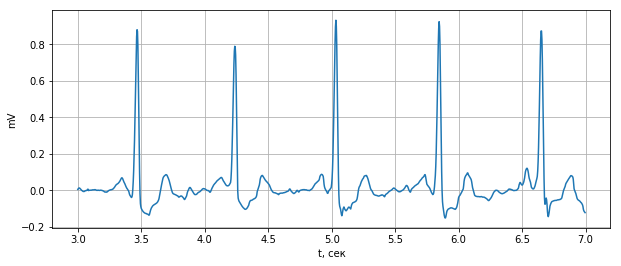

In [4]:
# Plot this ecg
ecg.print_ecg(ecg.indices[0], start=3, end=7)

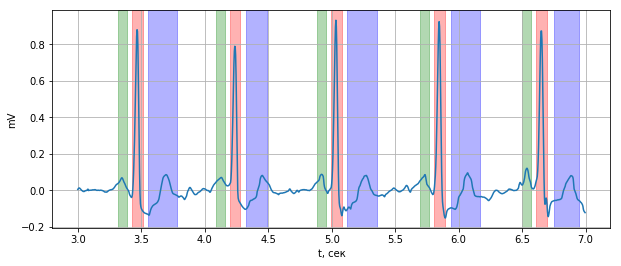

In [5]:
# Plot this ecg
ecg.print_ecg(ecg.indices[0], start=3, end=7, annotate=True)

In [6]:
# Predict ECG parameters and print output
ecg.calculate_report(ecg.indices[0])

| Параметр            |   Значение | Ед. изм.   |
|---------------------+------------+------------|
| ЧСС                 |      79.3  | Уд./сек.   |
| QRS интервал        |       0.08 | сек.       |
| PQ интервал         |       0.11 | сек.       |
| QT интервал         |       0.38 | сек.       |
| Вероятность аритмии |      14.73 | %          |
